In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

# Purpose 

>  Do the cell lines characterized in [Cancer Cell Line Encyclopedia](https://portals.broadinstitute.org/ccle) (CCLE) represent the U.S. population well? 

# CCLE Estimated Ancestry 
	
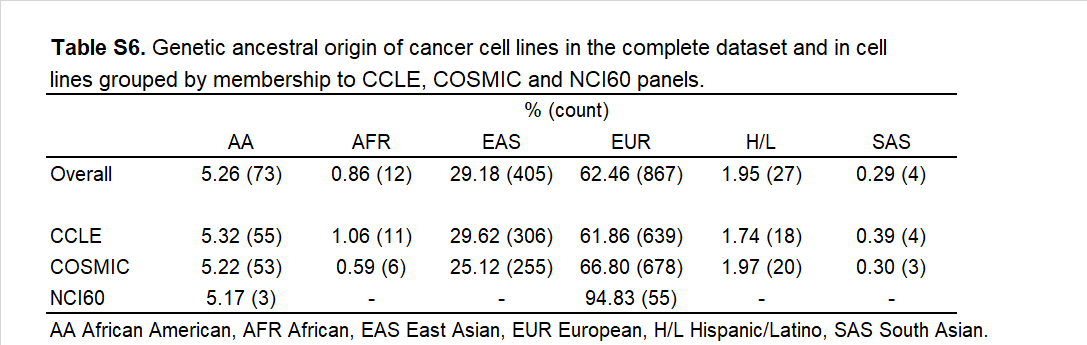


source: supplementary [table](https://cancerres.aacrjournals.org/highwire/filestream/368947/field_highwire_adjunct_files/0/208089_2_supp_5210173_pp1579.xlsx). Full paper can be found [here](https://cancerres.aacrjournals.org/content/79/7/1263.figures-only)

1. Dutil J, Chen Z, Monteiro AN, Teer JK, Eschrich SA. An Interactive Resource to Probe Genetic Diversity and Estimated Ancestry in Cancer Cell Lines. Cancer Res. 2019 Apr 1;79(7):1263–73.

# US demographics 

**race** | **percentage** 
--- | --- 
White alone | 76.5%  
Black or African American alone	| 13.4%  
American Indian and Alaska Native alone	| 1.3%  
Asian alone	| 5.9%  
Native Hawaiian and Other Pacific Islander alone | 0.2%  
Two or More Races |2.7%  
Hispanic or Latino | 18.3%  
White alone, not Hispanic or Latino  | 60.4%  
 
2. U.S. Census Bureau QuickFacts: United States [Internet]. [cited 2020 Jun 6]. Available from: https://www.census.gov/quickfacts/fact/table/US/PST045219

In [38]:
# aggregated from U.S. Census Bureau data (2) and CCLE estimated ancestry (1)
eth =           ['white', 'african-american', 'american-indian', 'asian', 'native-hawaiian',  'hispanic/latino', '?' ]
p   =           [0.604  ,  0.134           , 0.013            , 0.059  ,  0.002            ,   0.183           ,0.005]
ccle_eth_cnt =  [639    ,  66              , 0                , 310     , 0                ,   18              ,0    ]

# number of permuations to run
n_permutations = 100000

samples = {e:[] for e in eth}
for n in range(n_permutations): 
    s = np.random.choice(eth, size=np.sum(ccle_eth_cnt), p=p)
    [samples[e].append(np.sum(s==e)) for e in eth]

C:\anaconda-3.5.2.0\lib\site-packages\scipy\stats\stats.py:1792: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  pct = (np.mean(a_len[idx]) / n) * 100.0


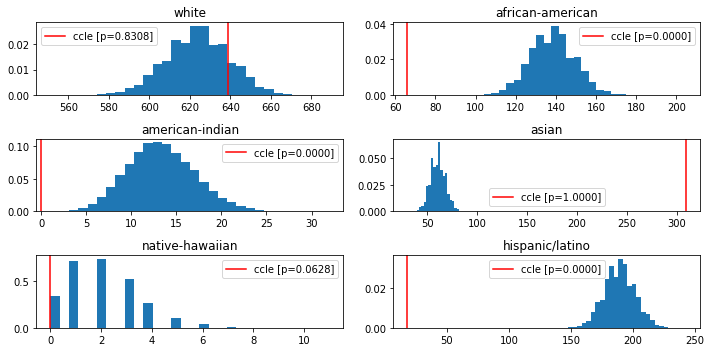

In [42]:
f, axes = plt.subplots(3,2, figsize=(10,5))

for ax,e,c in zip(axes.flat, eth, ccle_eth_cnt): 
    ax.hist(samples[e], density=True, bins=30)
    ax.set_title(e)
    ax.axvline(c, c='r', label=f'ccle [p={stats.percentileofscore(samples[e], c)/100:.4f}]')
    ax.legend()
    
plt.tight_layout()
plt.show()